# 1.) Define Enviornment

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

grid_size = 5
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)
agent_position = [0, 0]
goal_position = [4, 4]

# Rewards
rewards = {'goal': 1, 'other': -0.01}  # Minor negative reward to encourage exploration

# Initialize Q-table
Q_table = np.zeros((grid_size, grid_size, num_actions))

# Learning parameters
learning_rate = 0.1
discount_factor = 0.95
episodes = 1000
epsilon = 0.1  # Exploration rate

# 2.) Define Action Rewards

In [26]:

# Visualization setup
def plot_episode(steps, episode):
    clear_output(wait=True)
    plt.figure(figsize=(5, 5))
    plt.title(f"Episode: {episode}, Steps: {steps}")
    plt.xlim(-0.5, grid_size-0.5)
    plt.ylim(-0.5, grid_size-0.5)
    plt.grid()

    for i in range(grid_size):
        for j in range(grid_size):
            if [i, j] == agent_position:
                plt.text(j, grid_size-1-i, 'A', ha='center', va='center')
            elif [i, j] == goal_position:
                plt.text(j, grid_size-1-i, 'G', ha='center', va='center')
            else:
                plt.text(j, grid_size-1-i, '.', ha='center', va='center')

    plt.show()

def move_agent(agent_position, action_index):
    if actions[action_index] == 'up' and agent_position[0] > 0:
        agent_position[0] -= 1
    elif actions[action_index] == 'down' and agent_position[0] < grid_size - 1:
        agent_position[0] += 1
    elif actions[action_index] == 'left' and agent_position[1] > 0:
        agent_position[1] -= 1
    elif actions[action_index] == 'right' and agent_position[1] < grid_size - 1:
        agent_position[1] += 1
    return agent_position

def get_reward(agent_position):
    if agent_position == goal_position:
        return rewards['goal']
    else:
        return rewards['other']


# 3.) Implement Basic Q learning

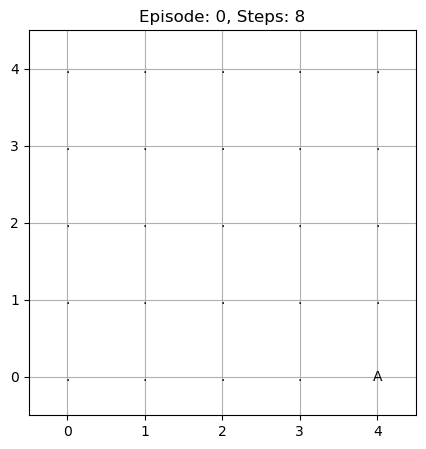

In [39]:

for episode in range(episodes):
    agent_position = [0, 0]  # Reset position at start of each episode
    steps = 0

    while agent_position != goal_position:
        steps += 1
        if np.random.rand() < epsilon:  # Explore
            action = np.random.randint(num_actions)
        else:  # Exploit
            action = np.argmax(Q_table[agent_position[0], agent_position[1], :])

        old_position = list(agent_position)
        new_position = move_agent(list(agent_position), action)
        reward = get_reward(new_position)

        # Update Q-table
        old_q_value = Q_table[old_position[0], old_position[1], action]
        future_q_value = np.max(Q_table[new_position[0], new_position[1], :])
        Q_table[old_position[0], old_position[1], action] = old_q_value + learning_rate * (reward + discount_factor * future_q_value - old_q_value)

        agent_position = new_position

        # Visualization every 100 episodes
        if episode % 100 == 0:
            plot_episode(steps, episode)
            time.sleep(0.1)  # Slow down the visualization

    if steps <= grid_size * 2:  # Early stop if it finds a reasonably good path
        break


# Same code with heatmap of the rewards

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure seaborn is imported for heatmap visualization
from IPython.display import clear_output
import time

grid_size = 5
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)
goal_position = [4, 4]

# Rewards
rewards = {'goal': 1, 'other': -0.01}

# Learning parameters
learning_rate = 0.1
discount_factor = 0.95
episodes = 1000
epsilon = 0.1

# Initialization
Q_table = np.zeros((grid_size, grid_size, num_actions))  # Initialize Q-table once, outside the trial loop
reward_heatmap = np.zeros((grid_size, grid_size))  # Initialize heatmap once, to keep the same heatmap
total_moves = 0  # Add a move counter

def plot_heatmap(reward_heatmap, agent_position, episode, trial, total_moves):
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))

    # Plot heatmap
    plt.subplot(1, 2, 1)
    ax = sns.heatmap(reward_heatmap, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=False)
    plt.title(f"Reward Heatmap: Trial {trial}, Episode {episode}, Moves: {total_moves}")
    # Adjusting the tick labels to match the 0 through 4 formatting
    ax.set_xticklabels(range(grid_size))
    ax.set_yticklabels(reversed(range(grid_size)))  # Reverse to match the grid orientation
    #plt.scatter(agent_position[1]+0.5, grid_size-agent_position[0]-0.5, color='red', s=100)  # Adjust agent's position marker size if needed

    # Plot agent's movement
    plt.subplot(1, 2, 2)
    plt.title(f"Agent Movement: Trial {trial}, Episode {episode}, Moves: {total_moves}")
    plt.xlim(-0.5, grid_size-0.5)
    plt.ylim(-0.5, grid_size-0.5)
    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.grid()
    for i in range(grid_size):
        for j in range(grid_size):
            if [i, j] == agent_position:
                plt.text(j, grid_size-1-i, 'A', ha='center', va='center', fontsize=12)
            elif [i, j] == goal_position:
                plt.text(j, grid_size-1-i, 'G', ha='center', va='center', fontsize=12)
            else:
                plt.text(j, grid_size-1-i, '.', ha='center', va='center', fontsize=12)

    plt.show()




def move_agent(agent_position, action_index):
    if actions[action_index] == 'up' and agent_position[0] > 0:
        agent_position[0] -= 1
    elif actions[action_index] == 'down' and agent_position[0] < grid_size - 1:
        agent_position[0] += 1
    elif actions[action_index] == 'left' and agent_position[1] > 0:
        agent_position[1] -= 1
    elif actions[action_index] == 'right' and agent_position[1] < grid_size - 1:
        agent_position[1] += 1
    return agent_position

def get_reward(agent_position):
    if agent_position == goal_position:
        return rewards['goal']
    else:
        return rewards['other']




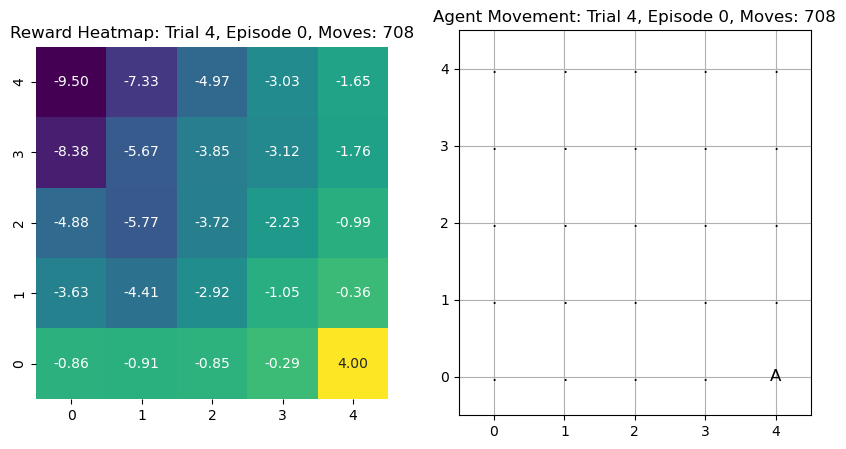

Total moves made over 4 trials: 708


In [43]:
trial_runs = 4 

for trial in range(1, trial_runs + 1):
    for episode in range(episodes):
        agent_position = [0, 0]  # Reset position at start of each episode
        steps = 0
        cumulative_rewards = np.zeros((grid_size, grid_size))  # Reset cumulative rewards

        while agent_position != goal_position:
            steps += 1
            total_moves += 1  # Increment move counter
            if np.random.rand() < epsilon:  # Explore
                action = np.random.randint(num_actions)
            else:  # Exploit
                action = np.argmax(Q_table[agent_position[0], agent_position[1], :])

            old_position = list(agent_position)
            new_position = move_agent(list(agent_position), action)
            reward = get_reward(new_position)
            cumulative_rewards[new_position[0], new_position[1]] += reward  # Update cumulative rewards

            # Update Q-table
            old_q_value = Q_table[old_position[0], old_position[1], action]
            future_q_value = np.max(Q_table[new_position[0], new_position[1], :])
            Q_table[old_position[0], old_position[1], action] = old_q_value + learning_rate * (reward + discount_factor * future_q_value - old_q_value)

            agent_position = new_position

            # Visualization every 100 episodes
            if episode % 100 == 0:
                reward_heatmap += cumulative_rewards  # Update reward heatmap
                plot_heatmap(reward_heatmap, agent_position, episode, trial, total_moves)
                time.sleep(0.1)  # Slow down the visualization

        if steps <= grid_size * 2: 
            break  # Break if a reasonably efficient path is found

# After all trials, you can print or log the total moves
print(f"Total moves made over {trial_runs} trials: {total_moves}")